<a href="https://colab.research.google.com/github/isaacmenchaca97/EfficientNetB0/blob/main/general_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip
!unzip coco_ann2017.zip

--2024-12-06 08:00:48--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.36.9, 3.5.20.215, 3.5.30.51, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.36.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco_ann2017.zip’

coco_ann2017.zip    100%[===================>] 241.19M  54.3MB/s    in 5.0s    

2024-12-06 08:00:53 (48.6 MB/s) - ‘coco_ann2017.zip’ saved [252907541/252907541]

Archive:  coco_ann2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
from pycocotools.coco import COCO
import requests

# Ruta al archivo de anotaciones (puedes descargarlo desde el sitio de COCO)
annFile = 'annotations/instances_val2017.json'

# Cargar el archivo de anotaciones
coco = COCO(annFile)

# Obtener los IDs de las imágenes
img_ids = coco.getImgIds()

# Generar una lista con las URLs de las imágenes
base_url = 'http://images.cocodataset.org/val2017/'  # Cambia según el conjunto de datos

uris = []
uris_name = []

# Obtener las URLs para las primeras 100 imágenes
for img_id in img_ids[:100]:
    img_info = coco.loadImgs(img_id)[0]
    img_url = base_url + img_info['file_name']
    uris.append(img_url)
    uris_name.append(img_info['file_name'])

# Ver las primeras 10 URLs generadas
for uri in uris[:10]:
    print(uri)

loading annotations into memory...
Done (t=1.40s)
creating index...
index created!
http://images.cocodataset.org/val2017/000000397133.jpg
http://images.cocodataset.org/val2017/000000037777.jpg
http://images.cocodataset.org/val2017/000000252219.jpg
http://images.cocodataset.org/val2017/000000087038.jpg
http://images.cocodataset.org/val2017/000000174482.jpg
http://images.cocodataset.org/val2017/000000403385.jpg
http://images.cocodataset.org/val2017/000000006818.jpg
http://images.cocodataset.org/val2017/000000480985.jpg
http://images.cocodataset.org/val2017/000000458054.jpg
http://images.cocodataset.org/val2017/000000331352.jpg


In [ ]:
import os
import requests
from urllib.parse import urlparse

# Función para descargar y guardar la imagen
def download_image(url, save_folder):
    # Hacer la solicitud HTTP para obtener la imagen
    response = requests.get(url)

    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        # Obtener el nombre de la imagen a partir de la URL
        image_name = os.path.basename(urlparse(url).path)

        # Crear la ruta completa para guardar la imagen
        save_path = os.path.join(save_folder, image_name)

        # Guardar la imagen en el directorio especificado
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Imagen guardada en: {save_path}")
    else:
        print(f"Error al descargar la imagen: {url}")

# Carpeta donde se guardarán las imágenes
save_folder = 'downloaded_images'

# Crear la carpeta si no existe
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Descargar y guardar cada imagen
for url in uris:
    download_image(url, save_folder)

Imagen guardada en: downloaded_images/000000397133.jpg
Imagen guardada en: downloaded_images/000000037777.jpg
Imagen guardada en: downloaded_images/000000252219.jpg
Imagen guardada en: downloaded_images/000000087038.jpg
Imagen guardada en: downloaded_images/000000174482.jpg
Imagen guardada en: downloaded_images/000000403385.jpg
Imagen guardada en: downloaded_images/000000006818.jpg
Imagen guardada en: downloaded_images/000000480985.jpg
Imagen guardada en: downloaded_images/000000458054.jpg
Imagen guardada en: downloaded_images/000000331352.jpg
Imagen guardada en: downloaded_images/000000296649.jpg
Imagen guardada en: downloaded_images/000000386912.jpg
Imagen guardada en: downloaded_images/000000502136.jpg
Imagen guardada en: downloaded_images/000000491497.jpg
Imagen guardada en: downloaded_images/000000184791.jpg
Imagen guardada en: downloaded_images/000000348881.jpg
Imagen guardada en: downloaded_images/000000289393.jpg
Imagen guardada en: downloaded_images/000000522713.jpg
Imagen gua

In [ ]:
import torch
from torchvision.models import efficientnet_b0

# Cargar el modelo preentrenado
model = efficientnet_b0(pretrained=True)

# Cambiar a modo de evaluación (inferencia)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 55.1MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
from torchvision import transforms
from PIL import Image

# Transformaciones necesarias
preprocess = transforms.Compose([
    transforms.Resize(256),                # Escalar el lado más pequeño a 256 píxeles
    transforms.CenterCrop(224),            # Recortar el centro a 224x224
    transforms.ToTensor(),                 # Convertir a tensor
    transforms.Normalize(                  # Normalizar con medias y desviaciones estándar de ImageNet
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [ ]:
import json
import urllib.request

url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
response = urllib.request.urlopen(url)
labels = json.load(response)

predictions = []

for name in uris_name:
    # Cargar una imagen
    image = Image.open("downloaded_images/" + name).convert("RGB")
    input_tensor = preprocess(image).unsqueeze(0)  # Añadir dimensión batch

    # Desactivar gradientes para inferencia más rápida
    with torch.no_grad():
        output = model(input_tensor)

    # Convertir salidas a probabilidades con softmax
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Mostrar la clase más probable
    top1_idx = probabilities.argmax().item()
    print(f"Predicción: {labels[top1_idx]} (Confianza: {probabilities[top1_idx]*100:.2f}%)")

    predictions.append(float(probabilities[top1_idx]*100))

Predicción: restaurant (Confianza: 57.56%)
Predicción: microwave oven (Confianza: 87.48%)
Predicción: shopping cart (Confianza: 11.62%)
Predicción: unicycle (Confianza: 99.36%)
Predicción: moped (Confianza: 37.55%)
Predicción: toilet seat (Confianza: 31.58%)
Predicción: toilet seat (Confianza: 33.82%)
Predicción: scooter (Confianza: 30.81%)
Predicción: tub (Confianza: 24.50%)
Predicción: toilet seat (Confianza: 74.44%)
Predicción: scooter (Confianza: 32.42%)
Predicción: laptop computer (Confianza: 19.17%)
Predicción: prison (Confianza: 36.36%)
Predicción: television (Confianza: 44.23%)
Predicción: tray (Confianza: 19.99%)
Predicción: wing (Confianza: 22.73%)
Predicción: ox (Confianza: 19.89%)
Predicción: park bench (Confianza: 75.15%)
Predicción: water buffalo (Confianza: 52.53%)
Predicción: taxicab (Confianza: 27.64%)
Predicción: moving van (Confianza: 42.32%)
Predicción: taxicab (Confianza: 54.98%)
Predicción: minibus (Confianza: 44.06%)
Predicción: trolleybus (Confianza: 49.04%)
Pre

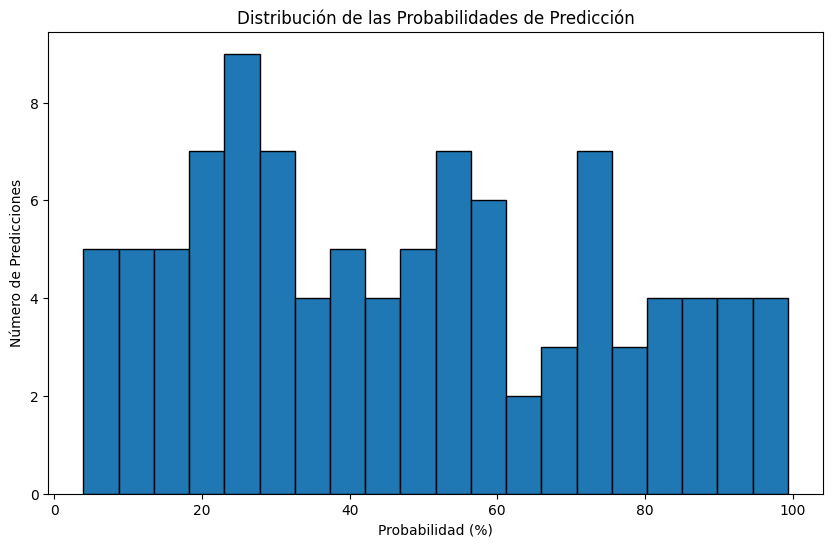

In [ ]:
import matplotlib.pyplot as plt

# Graficar el histograma de las probabilidades
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=20, edgecolor='black')
plt.title("Distribución de las Probabilidades de Predicción")
plt.xlabel("Probabilidad (%)")
plt.ylabel("Número de Predicciones")
plt.show()
